In [198]:
from functools import partial
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from awm import make_awm, calc_freq_max
from seismicarrays import make_default_arrays, make_array, parse_geometry
from utils.wavelets import rickerwave
from utils.filters import depth_lowpass, surface_to_depth, seis_gain

Text(0.5, 1.0, 'Velocity field')

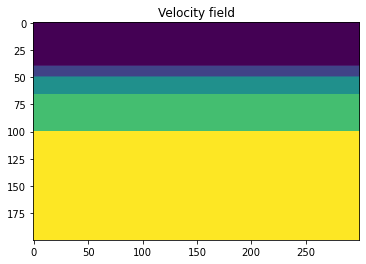

In [159]:
nz, nx = model_shape = 200, 300
dz, dx = 10, 10
v = np.empty(model_shape)

v[None:nz//5] = 2000
v[nz//5:nz//4] = 2200
v[nz//4:nz//3] = 2500
v[nz//3:nz//2] = 2700
v[nz//2:None] = 3000

v = tf.Variable(v, dtype='float32')

plt.imshow(v)
plt.title('Velocity field')

In [187]:
dt = 0.002  # s
nt = int(0.7 / dt)

In [188]:
sp_order = 8  # laplacian order
freq_max = calc_freq_max(np.min(v), dz, dx, sp_order=sp_order)
print(freq_max)

54.94505494505495


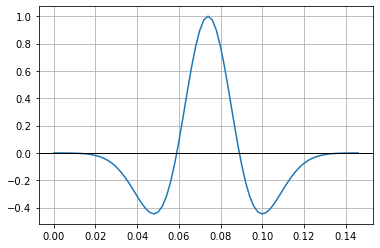

In [189]:
freq = 15
signal = rickerwave(freq, dt)
plt.plot(dt*np.arange(signal.size), signal)
plt.axhline(0, c='k', lw=1)
plt.grid()

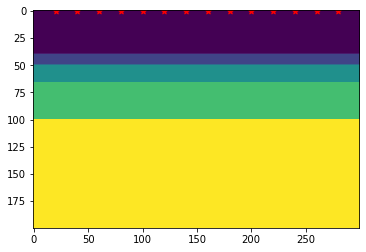

In [190]:
srcsgns, srccrds, reccrds, true_srccrds, true_reccrds = make_array(
    srcsgn=signal,
    geometry='5200-130-0',  # seismic geometry
    rr=130,   # receptor to receptor distance
    ss=5200,  # source to source distance
    dx=260,   # grid spacing in x direction
    nx=nx,    # grid length in x direction
    ns=None,  # number of shots (None = automatic)
    all_recs=True,  # use all receptors for shot? (overwrites previous settings)
)

sz, sx = np.asarray([[(z,x) for (z,x,t0) in srccrd][0] for srccrd in srccrds]).T
plt.imshow(v)
plt.scatter(sx, sz, c='r', marker='*')

In [191]:
awm, samp_rate = make_awm(v.shape,
                          dz,
                          dx,
                          dt,
                          tsolver='fd',   # fd, re
                          spsolver='fd',  # fd, sp
                          sp_order=sp_order,
                          v_max=np.max(v),
                          return_samp_rate=True)

print(f'nt = {nt}',
      f'modeling rate = {samp_rate}',
      f'modeling nt = {nt * samp_rate}',
      sep='\n')

nt = 349
modeling rate = 2
modeling nt = 698


In [ ]:
s = 7  # shot 7

In [ ]:
P = awm(v, nt=nt, srcsgns=srcsgns[s], srccrds=srccrds[s], reccrds=reccrds[s], out='snaps')

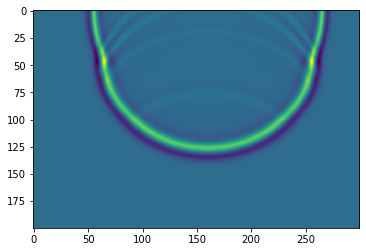

In [196]:
plt.imshow(P[300])

In [ ]:
seis = awm(v, nt=nt, srcsgns=srcsgns[s], srccrds=srccrds[s], reccrds=reccrds[s], out='seis')

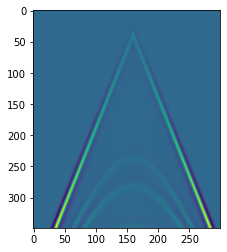

In [199]:
plt.imshow(seis_gain(seis))